In [35]:
#imports
import random

from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

from copy import deepcopy
from pprint import pprint

from nltk.sentiment import  SentimentIntensityAnalyzer

import os

# import spacy
# nlp = spacy.load("en_core_web_sm")

import matplotlib.image as mpimg




#ptwitterwordslemma plumber
#csv.preview
import pandas as pd
#import unicode character database
import unicodedata
#import regular expression operations
import re

#import natural language toolkit
import nltk
from nltk.corpus import words
#import our aquire


#import our stopwords list
from nltk.corpus import stopwords
from copy import deepcopy







from matplotlib_venn_wordcloud import venn3_wordcloud,venn2_wordcloud
from wordcloud import WordCloud,ImageColorGenerator
from matplotlib_venn import venn3, venn3_circles,venn2_circles,venn2,venn2_unweighted



In [36]:
# Read from the pickle and then display the unique file


# The remaing is explore


In [37]:



def stopfilter(text,stop_words_extend_reduce=["'"]):
    'we use symmetric difference so if a is already in stop words then it will be added to our third set else our third set will be missing it'
    #create oujr english stopwords list
    stops = set(pd.read_pickle('stopwords.pkl'))

   
    stop_words_extend_reduce=set(stop_words_extend_reduce)
    stops=stops.symmetric_difference(stop_words_extend_reduce)

    # stops=(stops|stop_words_extend)-exclude_words
    #another way
    
    filtered=list(filter((lambda x: x not in stops), text.split()))
    filtered=' '.join(filtered)

    return filtered



twitterwordslemma=pd.read_pickle('maindalemma.pkl')







In [38]:

twitterwordslemma['word_count'] = twitterwordslemma['lemmatized'].str.split(' ').apply(len)

#Message_length feature:
twitterwordslemma['message_length'] = twitterwordslemma['lemmatized'].str.len()

#sentiment feature:
s = SentimentIntensityAnalyzer()
twitterwordslemma['sentiment'] = twitterwordslemma.lemmatized.apply(lambda doc: s.polarity_scores(doc)['compound'])






twitterwordslemma['i_e'] = np.where(twitterwordslemma['type'].str[0] == 'I', 0, 1)
twitterwordslemma['s_n'] = np.where(twitterwordslemma['type'].str[1] == 'S', 0, 1)
twitterwordslemma['f_t'] = np.where(twitterwordslemma['type'].str[2] == 'F', 0, 1)
twitterwordslemma['p_j'] = np.where(twitterwordslemma['type'].str[3] == 'P', 0, 1)

In [39]:
num=0
bigdict_type={'type':{},'lemmatized':{},'freq':{}}

group1=twitterwordslemma[['lemmatized','type']].groupby('type')
group1.groups.keys()
for i in group1.groups.keys():
    
    x=(','.join(list(group1.get_group(i).lemmatized.values)).strip())
  
    x=stopfilter(x)
    
   
    y=(pd.Series(x.replace(',',' ').strip().split()).value_counts())
    cool=dict(y)
    bigdict_type['type'].update({num:i})
    bigdict_type['lemmatized'].update({num:x})
    bigdict_type['freq'].update({num:cool})
       

    num+=1
    



In [40]:

typeslemma=pd.DataFrame(bigdict_type)
x=str(typeslemma.lemmatized.values).replace(',',' ').replace('[','').replace(']','').replace('"','').replace("'",'').replace(',',' ').split()
y=dict(pd.Series(x).value_counts())
aggregatewordfrreq=y
# pd.to_pickle(aggregatewordfrreq,'agglemma.pkl')
num=len(typeslemma)


z=[i.replace(',',' ') for i in typeslemma.lemmatized.values]
typeslemma=pd.concat([typeslemma,pd.DataFrame({'type':{num:'COMBINED'},'lemmatized':{num:str(z).replace(',',' ').replace('[','').replace(']','').replace('"','').replace("'",'')},'freq':{num:aggregatewordfrreq}})])
pd.to_pickle(typeslemma,'typeslemma.pkl')


In [41]:

typeslemma=pd.read_pickle('typeslemma.pkl')


In [42]:

extroverteddf=typeslemma[['type','lemmatized']].iloc[0:7]
extroverteddf

type                                         lemmatized
0  enfj  wanna human look parents sadly lack thereof pa...
1  enfp  year freefire ffxjb gold ladies cannot wait wa...
2  entj  kindness fund building kinder braver world sta...
3  entp  tomorrow year cheers us youve yet signed weekl...
4  esfj  spooky science steve spangler safe scares audi...
5  esfp  points sre download free app latest football a...
6  estj  thank joe talbot creating world putting bunch ...

In [43]:

introverteddf=typeslemma[['type','lemmatized']].iloc[8:15]
introverteddf

type                                         lemmatized
8   infj  created place gather stories black women honor...
9   infp  dragon ball zone beerus less december back jun...
10  intj  today proud stand many around world women girl...
11  intp  math shouldnt limiting students dreams gateway...
12  isfj  new ep spotify happy happy happy happy happy m...
13  isfp  wakanda liftmeup music video liftmeup tonight ...
14  istj  unique film dostojee young bengali director pr...

In [44]:
freqdict=dict(typeslemma.freq.values[-1])
#set stuff
setlist=[]
for i in typeslemma.freq.values:
    setlist.append(set(i.keys()))

typelist=[]
for i in typeslemma.type.values:
    typelist.append(i)

typessetdict=dict(zip(typelist,setlist))






In [45]:

keys=list(typessetdict.keys())
combined=keys.pop(-1);combined
intersectiondict={}
c=set(typessetdict.get(combined))
keys.reverse()




 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        istp

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
6142 
intersection combined percent:
13.23%
number unique to 
1295
 percent unique of aggregate union combined:
2.79%
intersection with rest length:
4847 
intersection with rest percent overlap with combined:
10.44%




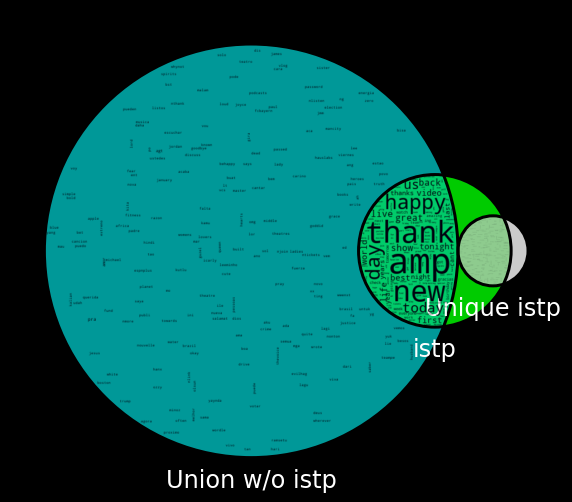

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        istj

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
2793 
intersection combined percent:
6.02%
number unique to 
536
 percent unique of aggregate union combined:
1.15%
intersection with rest length:
2257 
intersection with rest percent overlap with combined:
4.86%




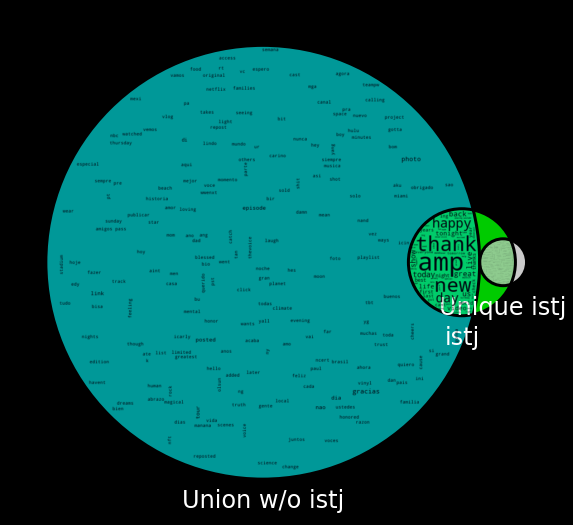

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        isfp

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
8597 
intersection combined percent:
18.52%
number unique to 
2084
 percent unique of aggregate union combined:
4.49%
intersection with rest length:
6513 
intersection with rest percent overlap with combined:
14.03%




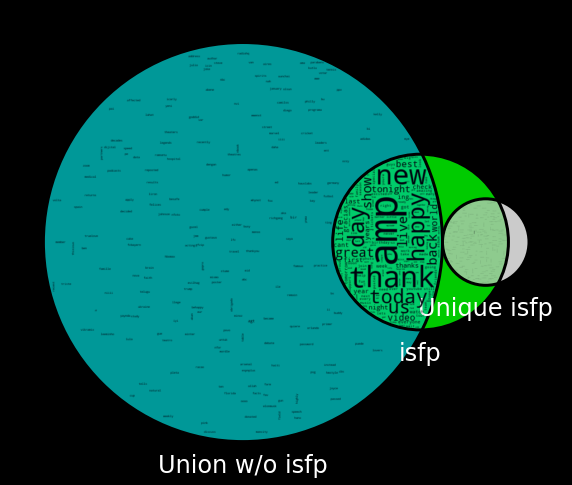

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        isfj

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
6648 
intersection combined percent:
14.32%
number unique to 
1339
 percent unique of aggregate union combined:
2.88%
intersection with rest length:
5309 
intersection with rest percent overlap with combined:
11.43%




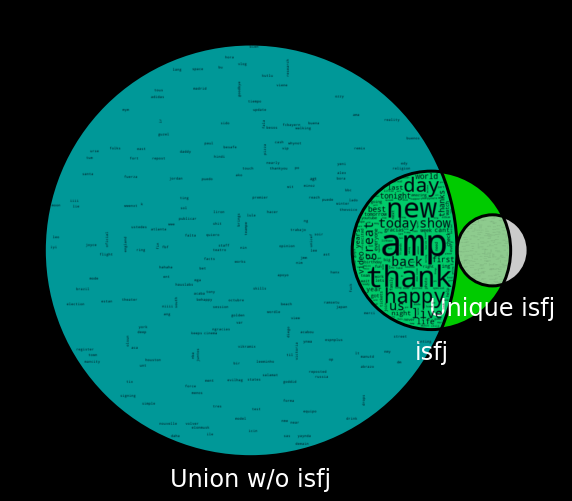

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        intp

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
3476 
intersection combined percent:
7.49%
number unique to 
570
 percent unique of aggregate union combined:
1.23%
intersection with rest length:
2906 
intersection with rest percent overlap with combined:
6.26%




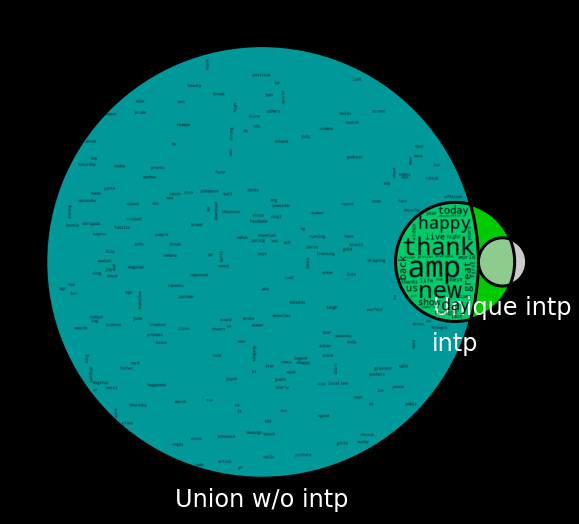

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        intj

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
2524 
intersection combined percent:
5.44%
number unique to 
337
 percent unique of aggregate union combined:
0.73%
intersection with rest length:
2187 
intersection with rest percent overlap with combined:
4.71%




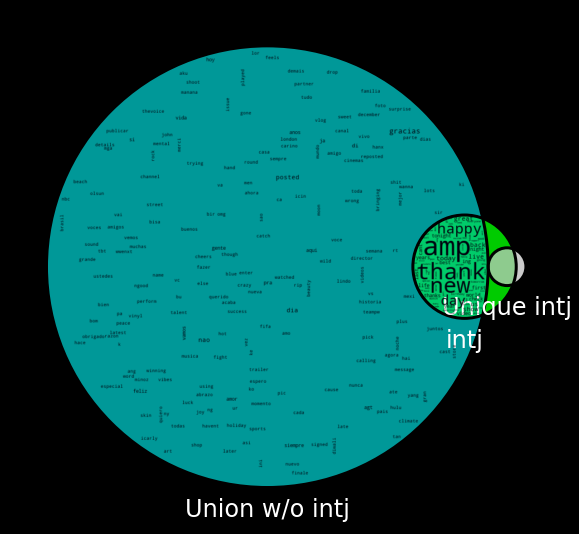

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        infp

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
4660 
intersection combined percent:
10.04%
number unique to 
867
 percent unique of aggregate union combined:
1.87%
intersection with rest length:
3793 
intersection with rest percent overlap with combined:
8.17%




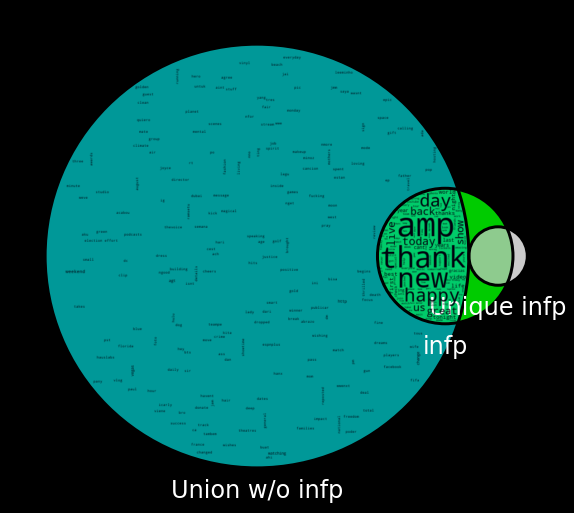

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        infj

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
5155 
intersection combined percent:
11.10%
number unique to 
887
 percent unique of aggregate union combined:
1.91%
intersection with rest length:
4268 
intersection with rest percent overlap with combined:
9.19%




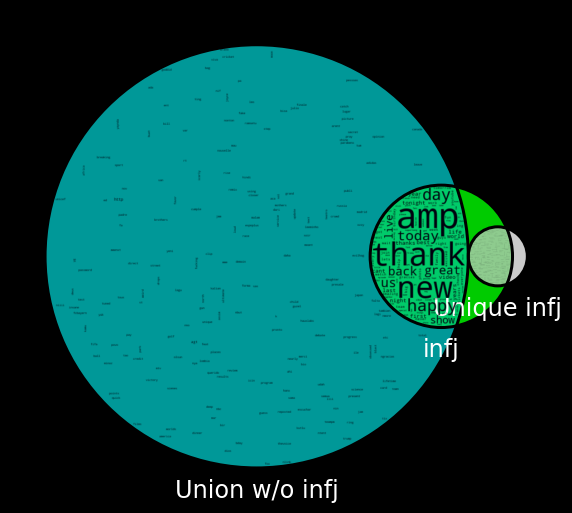

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        estp

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
9115 
intersection combined percent:
19.63%
number unique to 
2200
 percent unique of aggregate union combined:
4.74%
intersection with rest length:
6915 
intersection with rest percent overlap with combined:
14.89%




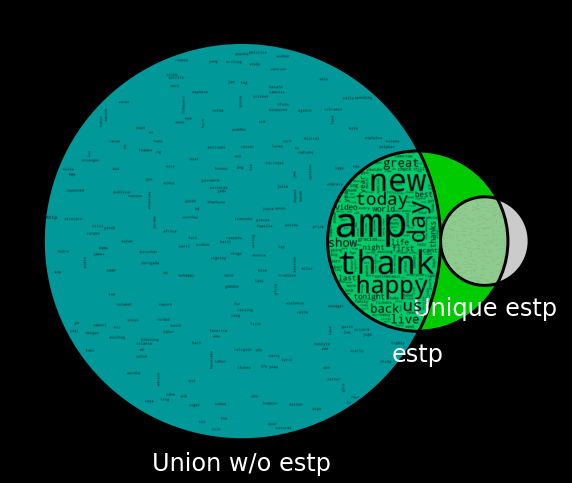

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        estj

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
5885 
intersection combined percent:
12.67%
number unique to 
1173
 percent unique of aggregate union combined:
2.53%
intersection with rest length:
4712 
intersection with rest percent overlap with combined:
10.15%




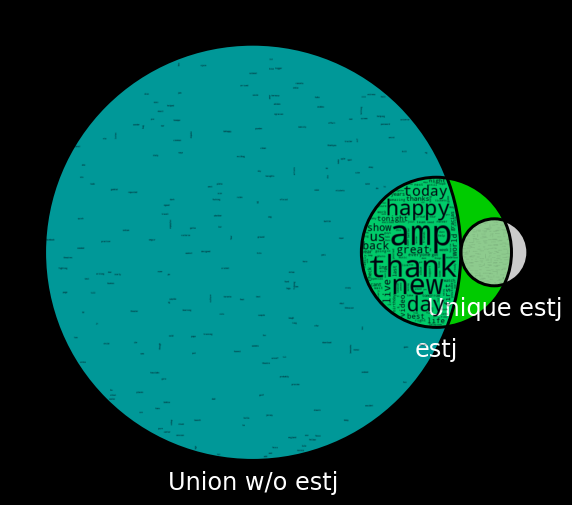

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        esfp

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
15034 
intersection combined percent:
32.38%
number unique to 
4717
 percent unique of aggregate union combined:
10.16%
intersection with rest length:
10317 
intersection with rest percent overlap with combined:
22.22%




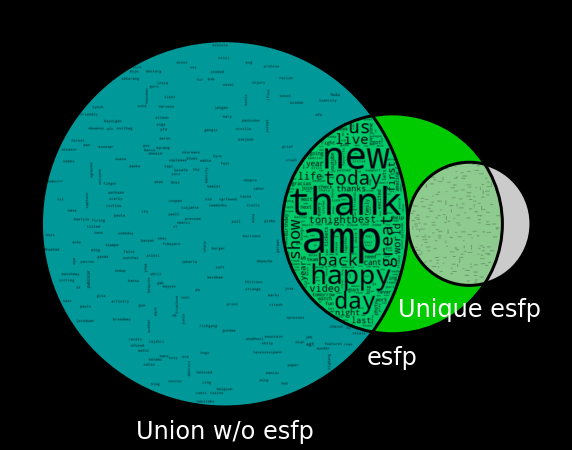

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        esfj

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
12053 
intersection combined percent:
25.96%
number unique to 
3593
 percent unique of aggregate union combined:
7.74%
intersection with rest length:
8460 
intersection with rest percent overlap with combined:
18.22%




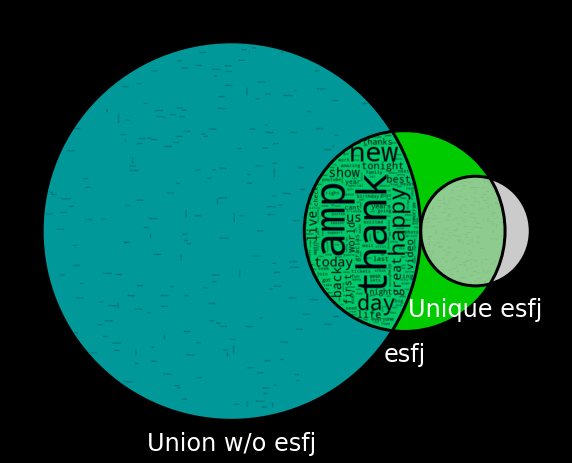

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        entp

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
10700 
intersection combined percent:
23.05%
number unique to 
3010
 percent unique of aggregate union combined:
6.48%
intersection with rest length:
7690 
intersection with rest percent overlap with combined:
16.56%




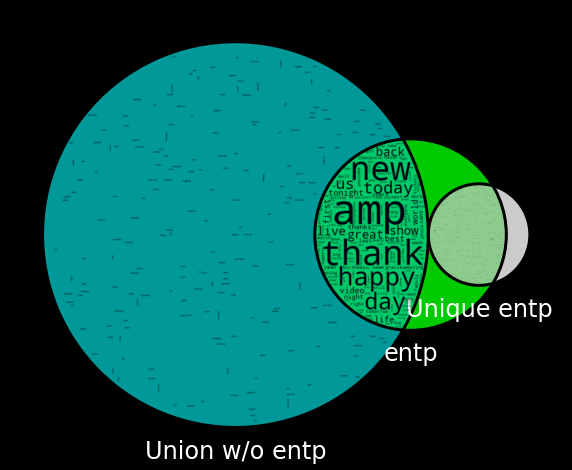

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        entj

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
4924 
intersection combined percent:
10.61%
number unique to 
855
 percent unique of aggregate union combined:
1.84%
intersection with rest length:
4069 
intersection with rest percent overlap with combined:
8.76%




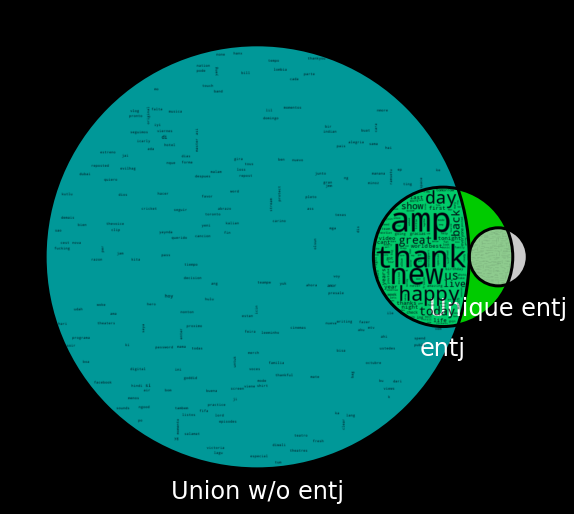

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        enfp

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
10943 
intersection combined percent:
23.57%
number unique to 
3047
 percent unique of aggregate union combined:
6.56%
intersection with rest length:
7896 
intersection with rest percent overlap with combined:
17.01%




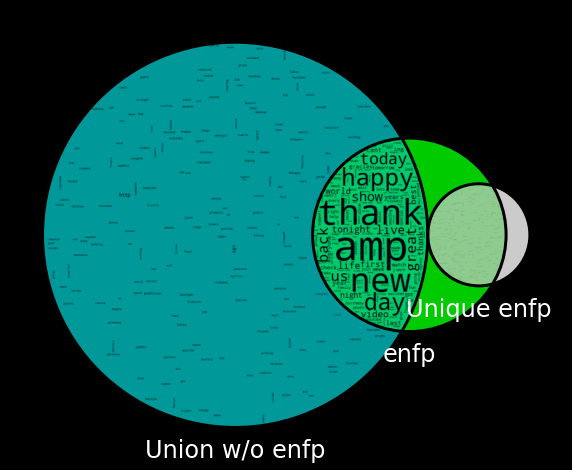

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        enfj

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
7787 
intersection combined percent:
16.77%
number unique to 
1874
 percent unique of aggregate union combined:
4.04%
intersection with rest length:
5913 
intersection with rest percent overlap with combined:
12.74%




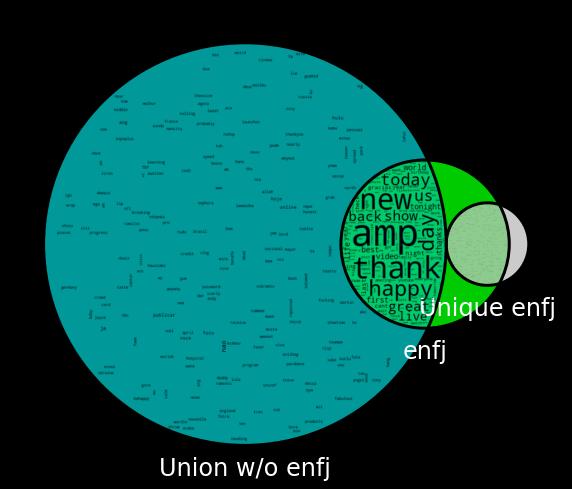

In [46]:
# wordcloud_kwargs=dict(max_font_size=10000, min_font_size=.5)
vennfigsize=(10,10)



for i,k in enumerate(keys):
    keyscopy=deepcopy(keys)
    kthset=set(typessetdict.get(k))
    int=c&kthset
    intersectiondict.update({k:int,'intersection count':len(int)})
    kfreq=freqdict.get(k)
   
    keyscopy.pop(i)
    unionwithoutk=set()
    fig,ax=plt.subplots(figsize=vennfigsize)
    
    [unionwithoutk.update(typessetdict.get(cop))for cop in keyscopy]
    print(f'{"_":>2}'*45,f'\n\n{k:>60}\n\n',f'{"_":>2}'*45,f'\n\nintersection length:\n{len(int)}',f'\nintersection combined percent:\n{(len(int)/len(c))*100:.2f}%')

   

    print(f'number unique to \n{len(kthset-unionwithoutk)}\n',f'percent unique of aggregate union combined:\n{((len(kthset-unionwithoutk))/len(c))*100:.2f}%')
    restint=kthset&unionwithoutk
    print(f'intersection with rest length:\n{len(restint)}',f'\nintersection with rest percent overlap with combined:\n{(len(restint)/len(c))*100:.2f}%\n\n')
    
    venn3_wordcloud([kthset,unionwithoutk,kthset-unionwithoutk], set_colors=['lime','c','w'],set_edgecolors=['0', '0','0'],ax=ax,set_labels=[f'{k}',f'Union w/o {k}',f'Unique {k}'],word_to_frequency=freqdict)#
    plt.show()
   



 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        istp

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
6142 
intersection combined percent:
13.23%
number unique to 
1295
 percent unique of aggregate union combined:
2.79%
intersection with rest length:
4847 
intersection with rest percent overlap with combined:
10.44%




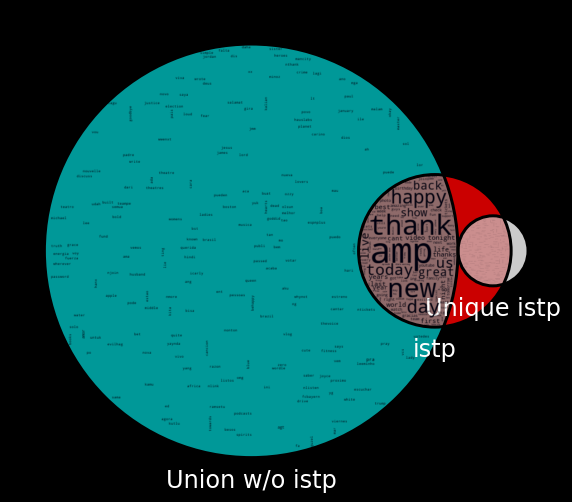

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        istj

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
2793 
intersection combined percent:
6.02%
number unique to 
536
 percent unique of aggregate union combined:
1.15%
intersection with rest length:
2257 
intersection with rest percent overlap with combined:
4.86%




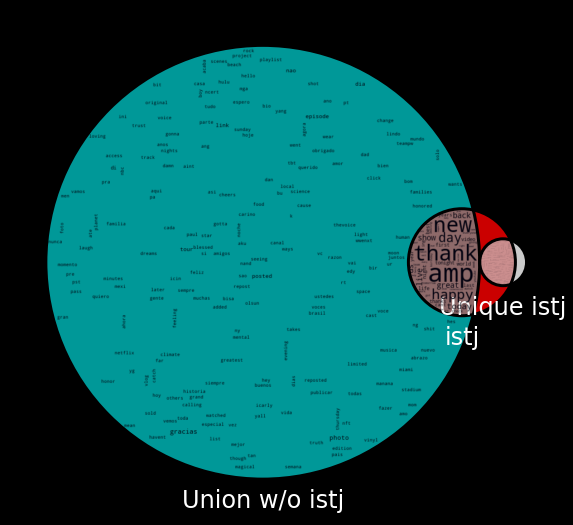

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        isfp

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
8597 
intersection combined percent:
18.52%
number unique to 
2084
 percent unique of aggregate union combined:
4.49%
intersection with rest length:
6513 
intersection with rest percent overlap with combined:
14.03%




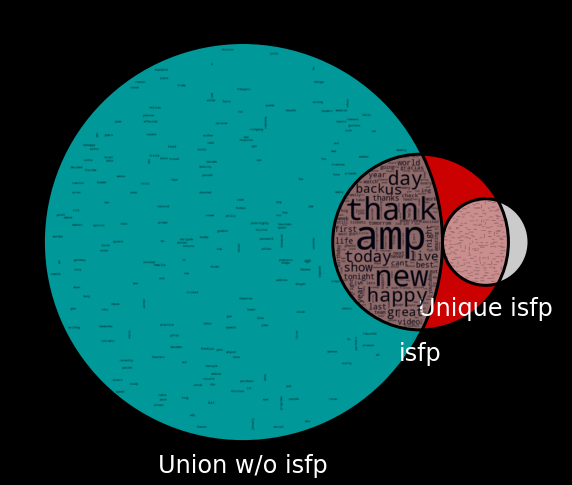

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        isfj

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
6648 
intersection combined percent:
14.32%
number unique to 
1339
 percent unique of aggregate union combined:
2.88%
intersection with rest length:
5309 
intersection with rest percent overlap with combined:
11.43%




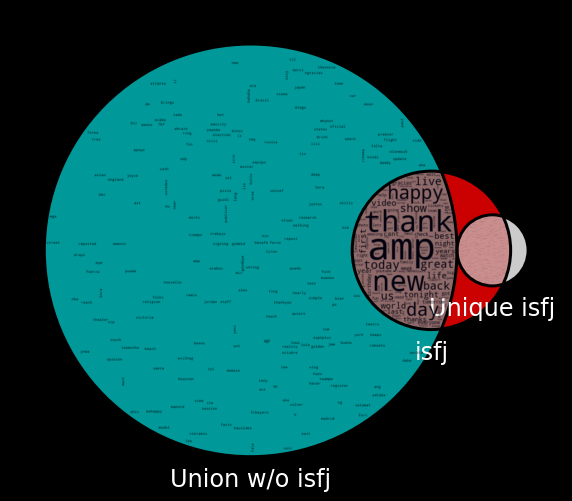

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        intp

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
3476 
intersection combined percent:
7.49%
number unique to 
570
 percent unique of aggregate union combined:
1.23%
intersection with rest length:
2906 
intersection with rest percent overlap with combined:
6.26%




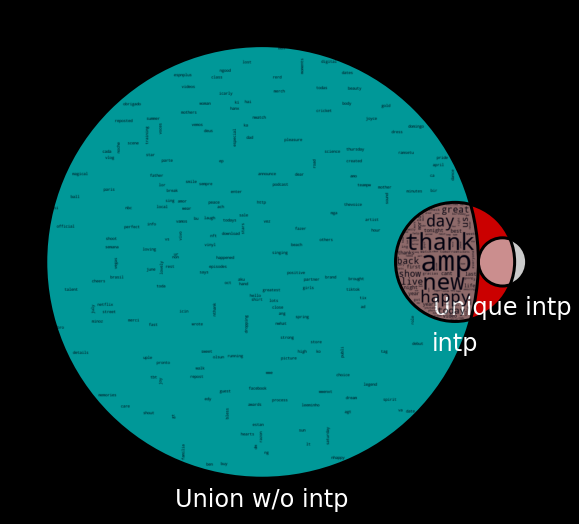

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        intj

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
2524 
intersection combined percent:
5.44%
number unique to 
337
 percent unique of aggregate union combined:
0.73%
intersection with rest length:
2187 
intersection with rest percent overlap with combined:
4.71%




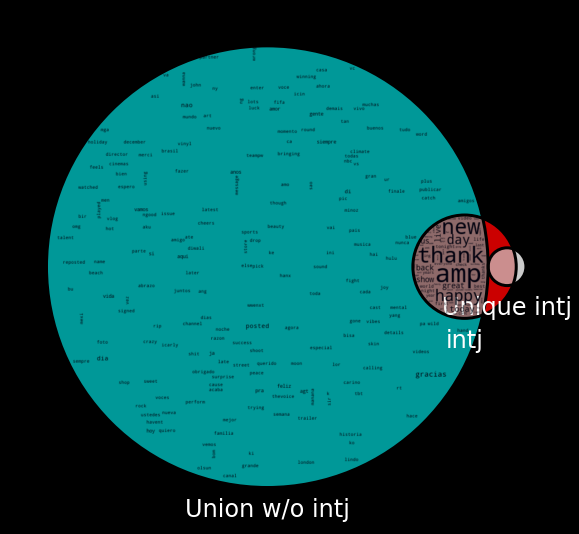

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        infp

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
4660 
intersection combined percent:
10.04%
number unique to 
867
 percent unique of aggregate union combined:
1.87%
intersection with rest length:
3793 
intersection with rest percent overlap with combined:
8.17%




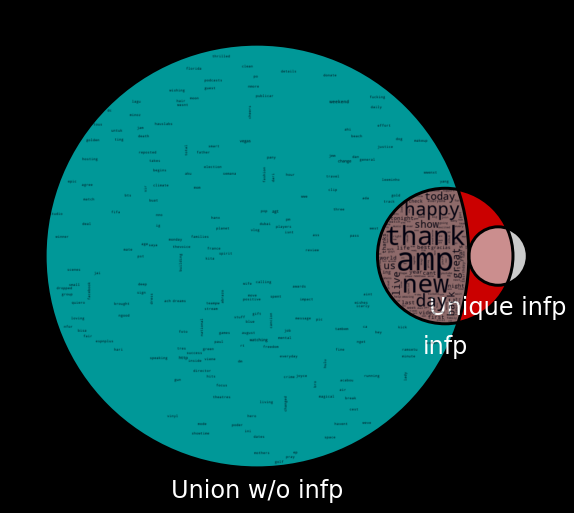

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        infj

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
5155 
intersection combined percent:
11.10%
number unique to 
887
 percent unique of aggregate union combined:
1.91%
intersection with rest length:
4268 
intersection with rest percent overlap with combined:
9.19%




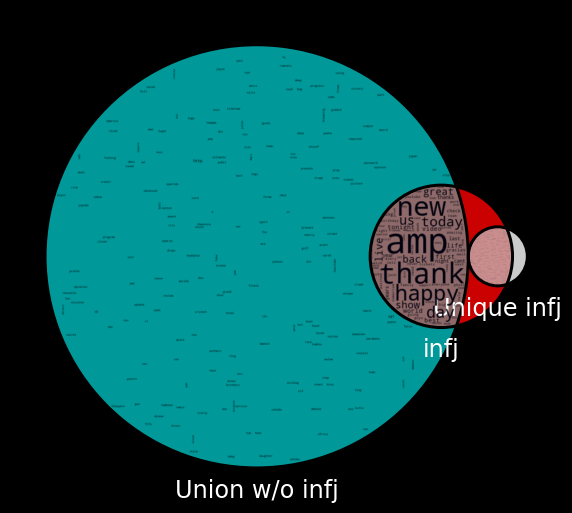

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        estp

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
9115 
intersection combined percent:
19.63%
number unique to 
2200
 percent unique of aggregate union combined:
4.74%
intersection with rest length:
6915 
intersection with rest percent overlap with combined:
14.89%




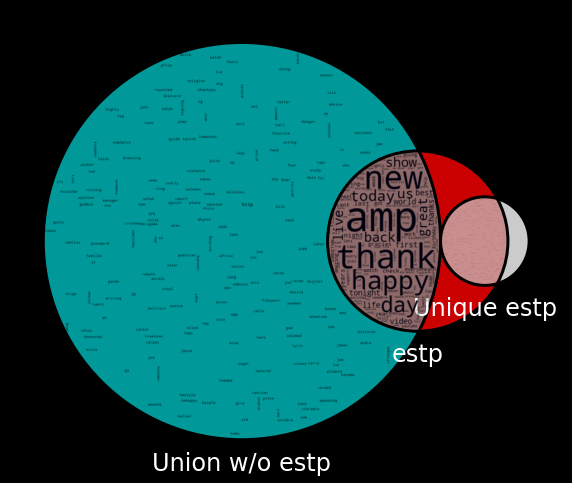

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        estj

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
5885 
intersection combined percent:
12.67%
number unique to 
1173
 percent unique of aggregate union combined:
2.53%
intersection with rest length:
4712 
intersection with rest percent overlap with combined:
10.15%




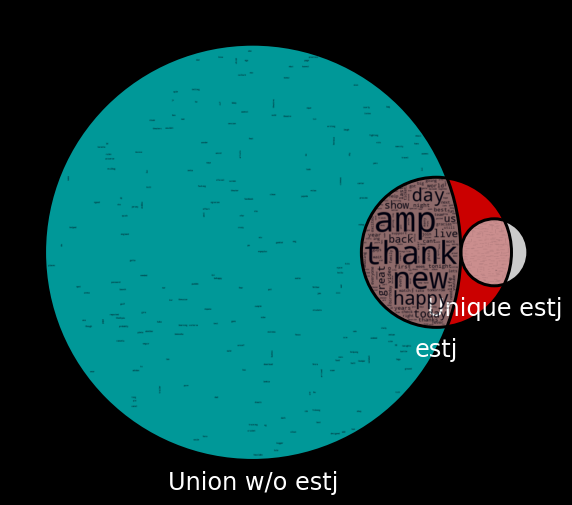

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        esfp

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
15034 
intersection combined percent:
32.38%
number unique to 
4717
 percent unique of aggregate union combined:
10.16%
intersection with rest length:
10317 
intersection with rest percent overlap with combined:
22.22%




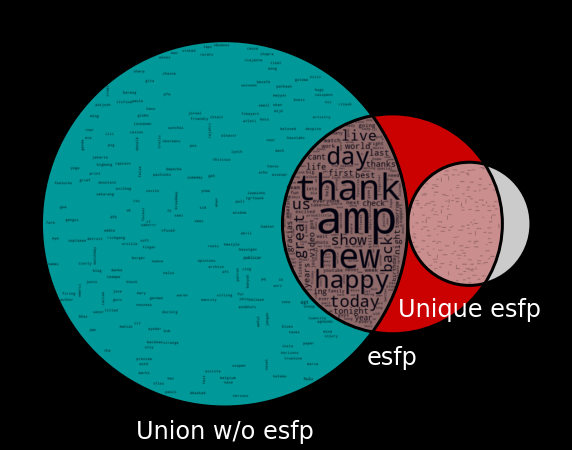

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        esfj

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
12053 
intersection combined percent:
25.96%
number unique to 
3593
 percent unique of aggregate union combined:
7.74%
intersection with rest length:
8460 
intersection with rest percent overlap with combined:
18.22%




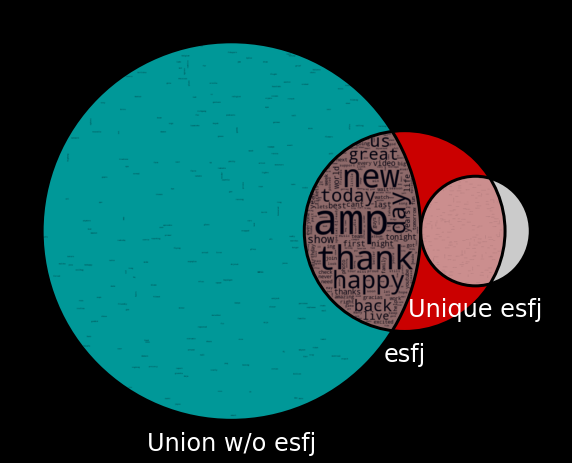

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        entp

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
10700 
intersection combined percent:
23.05%
number unique to 
3010
 percent unique of aggregate union combined:
6.48%
intersection with rest length:
7690 
intersection with rest percent overlap with combined:
16.56%




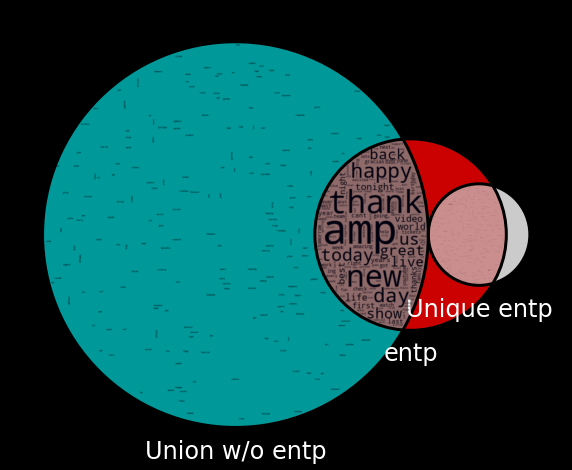

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        entj

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
4924 
intersection combined percent:
10.61%
number unique to 
855
 percent unique of aggregate union combined:
1.84%
intersection with rest length:
4069 
intersection with rest percent overlap with combined:
8.76%




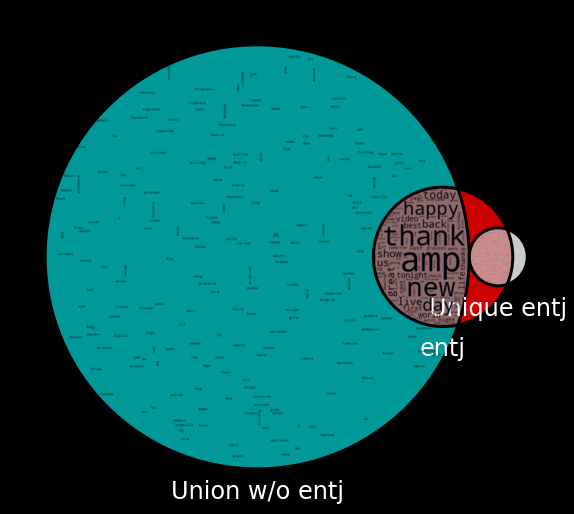

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        enfp

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
10943 
intersection combined percent:
23.57%
number unique to 
3047
 percent unique of aggregate union combined:
6.56%
intersection with rest length:
7896 
intersection with rest percent overlap with combined:
17.01%




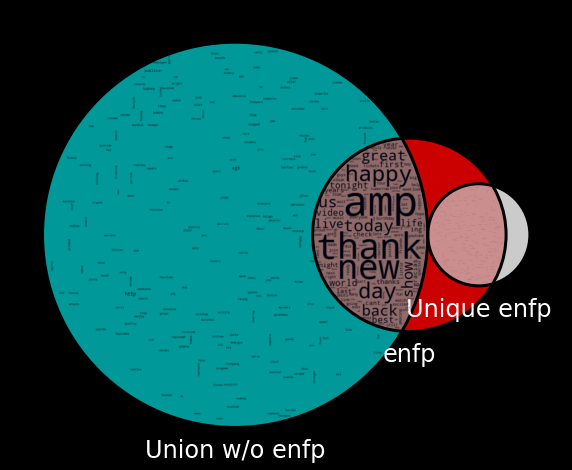

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        enfj

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
7787 
intersection combined percent:
16.77%
number unique to 
1874
 percent unique of aggregate union combined:
4.04%
intersection with rest length:
5913 
intersection with rest percent overlap with combined:
12.74%




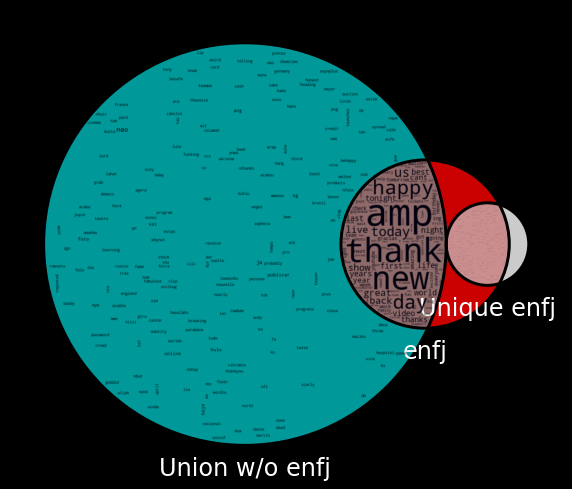

In [47]:

# wordcloud_kwargs=dict(max_font_size=10000, min_font_size=.5)

for i,k in enumerate(keys):
    keyscopy=deepcopy(keys)
    kthset=set(typessetdict.get(k))
    int=c&kthset
    intersectiondict.update({k:int,'intersection count':len(int)})
    kfreq=freqdict.get(k)
   
    keyscopy.pop(i)
    unionwithoutk=set()
    fig,ax=plt.subplots(figsize=vennfigsize)
    
    [unionwithoutk.update(typessetdict.get(cop))for cop in keyscopy]
    print(f'{"_":>2}'*45,f'\n\n{k:>60}\n\n',f'{"_":>2}'*45,f'\n\nintersection length:\n{len(int)}',f'\nintersection combined percent:\n{(len(int)/len(c))*100:.2f}%')

   

    print(f'number unique to \n{len(kthset-unionwithoutk)}\n',f'percent unique of aggregate union combined:\n{((len(kthset-unionwithoutk))/len(c))*100:.2f}%')
    restint=kthset&unionwithoutk
    print(f'intersection with rest length:\n{len(restint)}',f'\nintersection with rest percent overlap with combined:\n{(len(restint)/len(c))*100:.2f}%\n\n')
    
    venn3_wordcloud([kthset,unionwithoutk,kthset-unionwithoutk], set_colors=['red','c','w'],set_edgecolors=['0', '0','0'],ax=ax,set_labels=[f'{k}',f'Union w/o {k}',f'Unique {k}'],word_to_frequency=freqdict)#
    plt.show()
   




We have a total of 435 in the aggregate intersection
We remove that intersection to compare
 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        istp

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
5707 
intersection combined percent:
12.29%
number unique to istp
1295
 percent unique of aggregate union combined:
2.79%
intersection with rest length:
4412 
intersection with rest percent overlap with combined:
9.50%




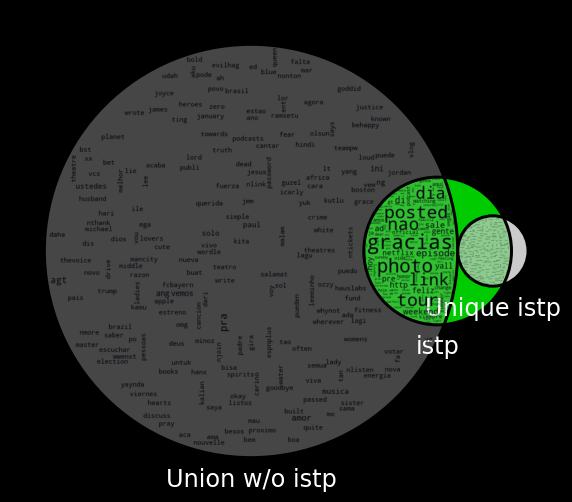

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                                        istj

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

intersection length:
2358 
intersection combined percent:
5.08%
number unique to istj
536
 percent unique of aggregate union combined:
1.15%
intersection with rest length:
1822 
intersection with rest percent overlap with combined:
3.92%




In [48]:
bigint=deepcopy(c)
[bigint.intersection_update(typessetdict.get(key))for key in keys]
print(f'We have a total of {len(bigint)} in the aggregate intersection\nWe remove that intersection to compare')
for i,k in enumerate(keys):
    keyscopy=deepcopy(keys)
    kthset=set(typessetdict.get(k))
    kthset=kthset-bigint
    int=(c&kthset)-bigint
    intersectiondict.update({k:int,'intersection count':len(int)})
    kfreq=freqdict.get(k)
   
    keyscopy.pop(i)
    unionwithoutk=set()
    fig,ax=plt.subplots(figsize=vennfigsize)
    
    [unionwithoutk.update(typessetdict.get(cop))for cop in keyscopy]
    unionwithoutk=unionwithoutk-bigint
    print(f'{"_":>2}'*45,f'\n\n{k:>60}\n\n',f'{"_":>2}'*45,f'\n\nintersection length:\n{len(int)}',f'\nintersection combined percent:\n{(len(int)/len(c))*100:.2f}%')

    unique=(kthset-unionwithoutk)-bigint

    print(f'number unique to {k}\n{len(unique)}\n',f'percent unique of aggregate union combined:\n{(len(unique)/len(c))*100:.2f}%')
    restint=(kthset&unionwithoutk)-bigint
    print(f'intersection with rest length:\n{len(restint)}',f'\nintersection with rest percent overlap with combined:\n{(len(restint)/len(c))*100:.2f}%\n\n')
    
    venn3_wordcloud([kthset,unionwithoutk,kthset-unionwithoutk], set_colors=['lime','.35','w'],set_edgecolors=['0', '0','0'],ax=ax,set_labels=[f'{k}',f'Union w/o {k}',f'Unique {k}'],word_to_frequency=freqdict)#
    plt.show()
   




In [ ]:


# from itertools import product 
  
# # Get all permutations of length 2 
# # and length 2 
# x=["".join(seq) for seq in product("01", repeat=4)]
# for i in x:
#     print(i[0])






In [ ]:
sumforavg=twitterwordslemma[['type','name']].groupby(['type']).nunique().sum()
tochart=(twitterwordslemma[['type','name']].groupby(['type']).nunique()/sumforavg)*100

tochart=tochart.reset_index()
tochart['percent']=tochart['name']

tochart.drop(columns='name',inplace=True)




tochart.index=tochart.type
tochart.drop(columns='type',inplace=True)
tochart=tochart.sort_values(by='percent',ascending=False)



genpoppercent=['13.8% 12.3% 11.6% 8.8% 8.7% 8.5% 8.1% 5.4% 4.4% 4.3% 3.3% 3.2% 2.5% 2.1% 1.8% 1.5%']
genpoppercent=str(genpoppercent).replace('%','').split()
genpoppercent=[float(i.replace('[','').replace(']','').replace('"','').strip("'")) for i in genpoppercent]


types=['ISFJ ESFI ISTJ ISFP ESTI ESFP ENFP ISTP INFP ESTP INTP ENTP ENFJ INTJ ENTI INFT']
types=str(types).split()


types=[(i.replace('[','').replace(']','').replace('"','').strip("'").lower()) for i in types]

pop=pd.DataFrame(index=types,data={'pop percentage':genpoppercent})

tochart=pd.concat([tochart,pop],axis=1,join='inner')
tochart.rename(columns={'percent':'found percent'},inplace=True)
cols=['pop percentage','found percent']
tochart=tochart[cols]
tochart.sort_values(by='pop percentage',ascending=False,inplace=True)


In [ ]:
# 
styleddf=tochart.T.style.background_gradient(cmap='Blues',axis=1).format(lambda x : f'{x:.1f}%')



In [ ]:
quad1=[0,0,0,0]
quad2=[0,0,0,0]
quad3=[0,.25,.35,.25]
quad4=[.35,.25,.35,.25]

explode = []
explode.extend(quad1)
explode.extend(quad2)
explode.extend(quad3)
explode.extend(quad4)





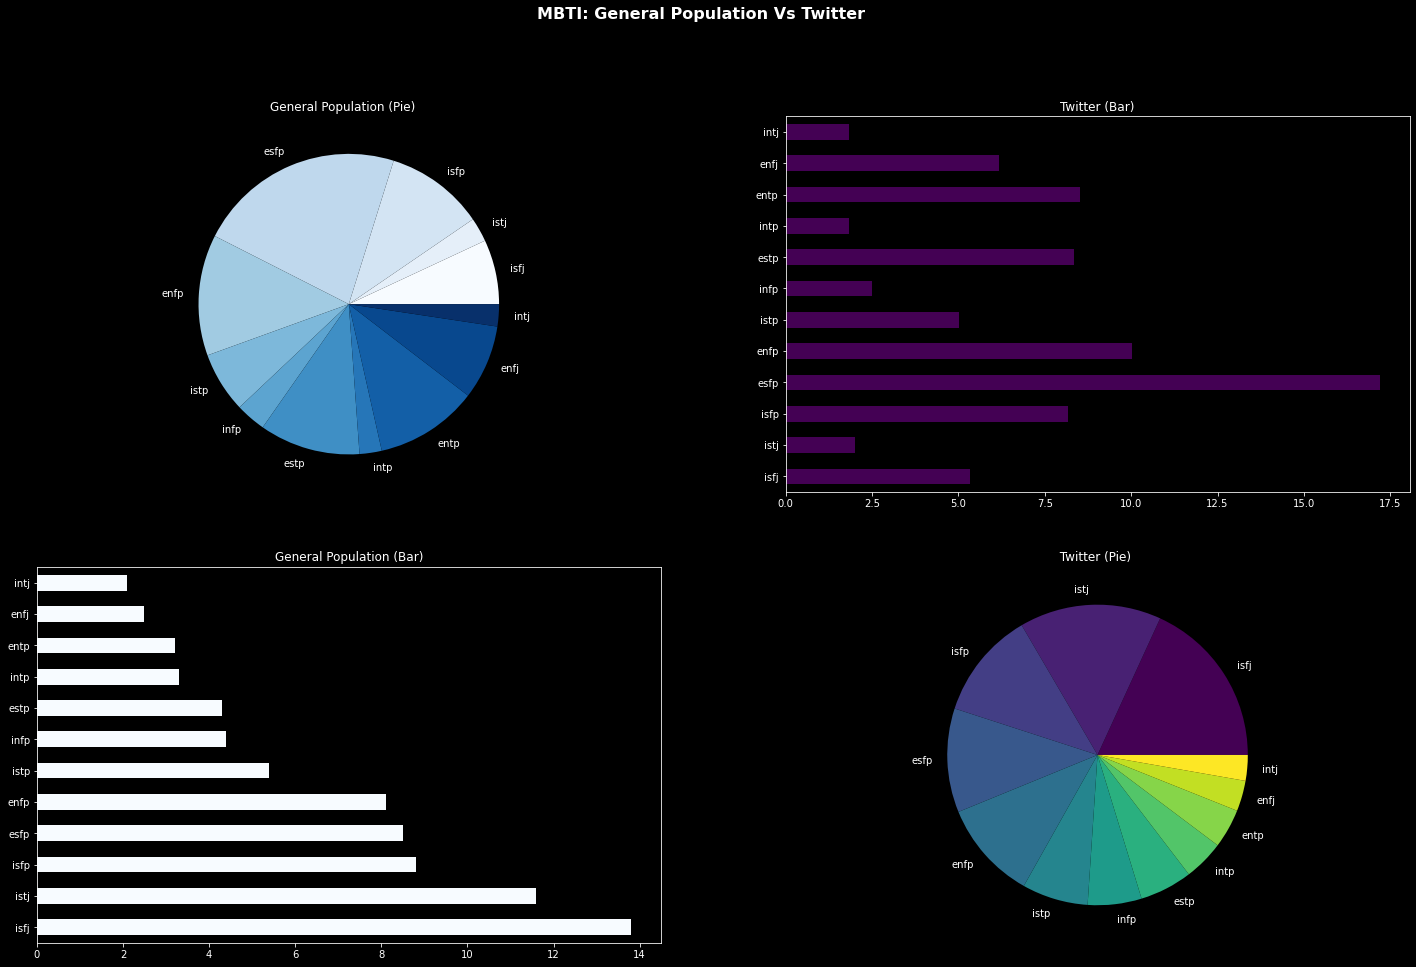

'Summary'

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)
m=1.23
fig = plt.figure(constrained_layout=False,figsize=(m*20,m*12.361))

gs = GridSpec(2, 2, figure=fig)

# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))



plt.suptitle('MBTI: General Population Vs Twitter',fontsize=16,weight='demibold')





ax1 = fig.add_subplot(gs[0, 0])
kwargs1={'title':'General Population (Pie)   ','ax':ax1,'legend':False,'ylabel':'',   'cmap':'Blues'}

tochart.plot.pie(y='found percent',**kwargs1)



ax2 = fig.add_subplot(gs[1, 1])

kwargs2={'title':'  Twitter (Pie)   ','ax':ax2,'legend':False,'ylabel':'',   'cmap':'viridis'}
tochart.plot.pie(y='pop percentage',**kwargs2)


ax3 = fig.add_subplot(gs[0,1])
kwargs3={'ax':ax3,'legend':False,'title':'Twitter (Bar)',   'cmap':'viridis'}

tochart.plot.barh(y='found percent',**kwargs3)




ax4 = fig.add_subplot(gs[1, 0])
kwargs4={'ax':ax4,'legend':False,'title':'General Population (Bar)',   'cmap':'Blues'}
tochart.plot.barh(y='pop percentage',**kwargs4)

plt.show()




fig.suptitle("GridSpec")
format_axes(fig)

plt.show()




display('Summary',styleddf)